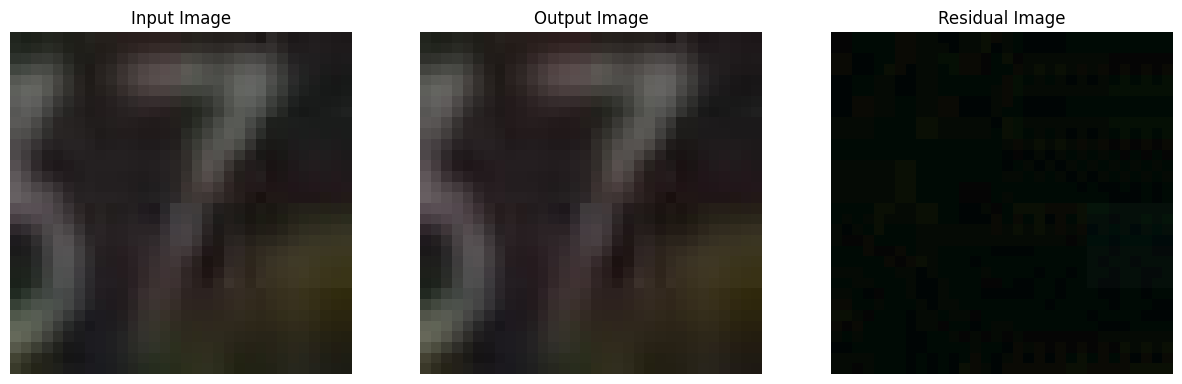

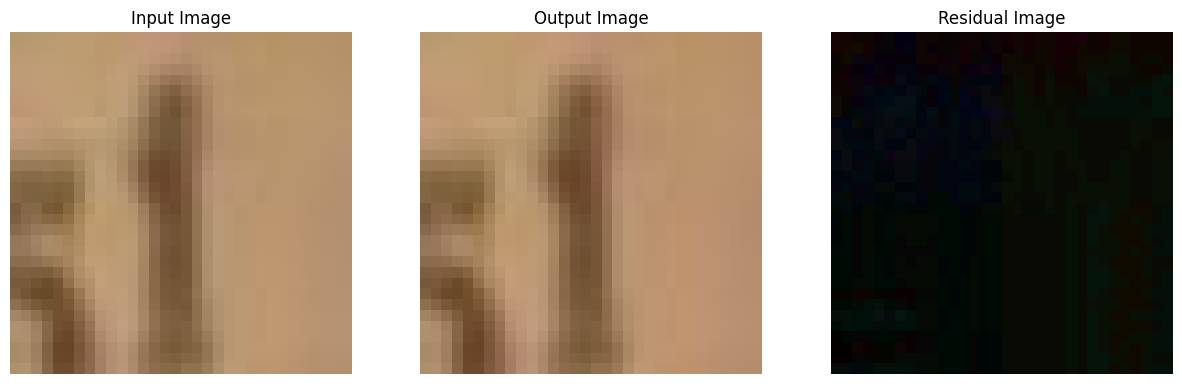

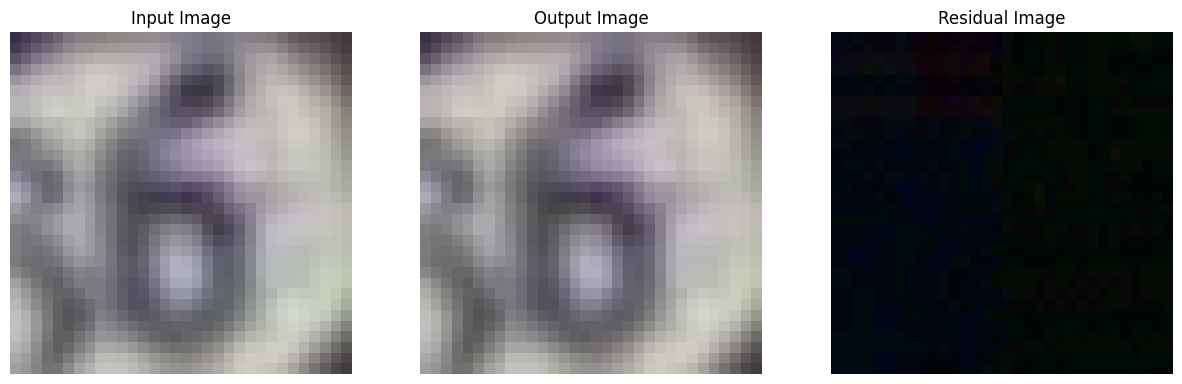

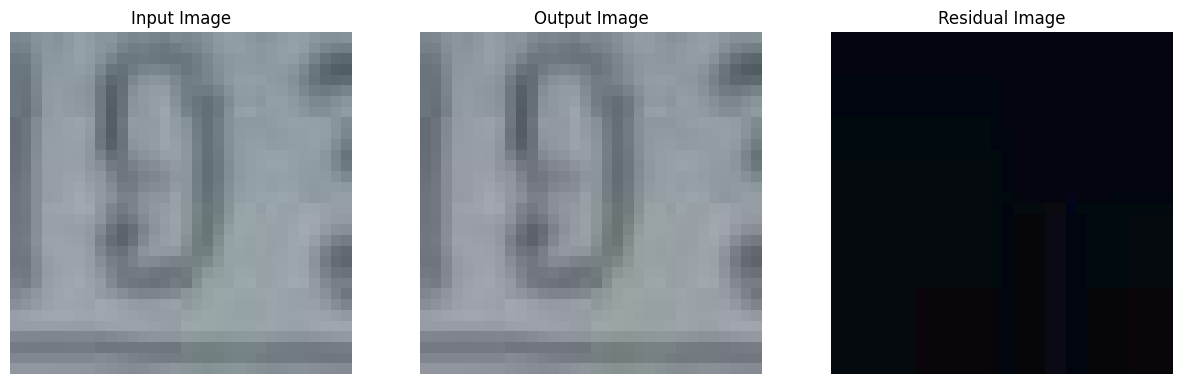

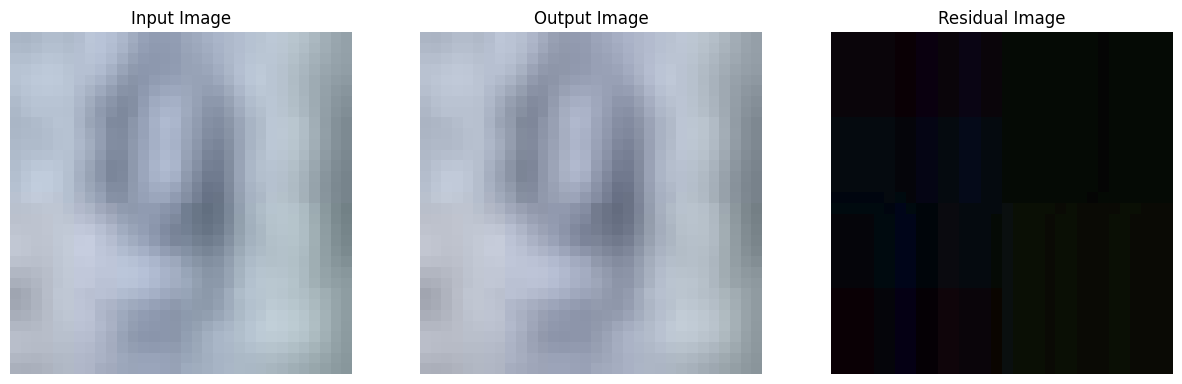

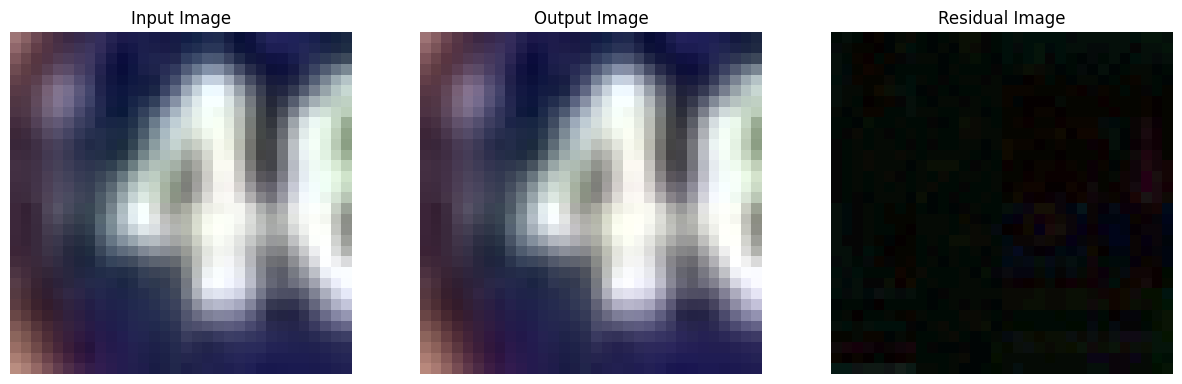

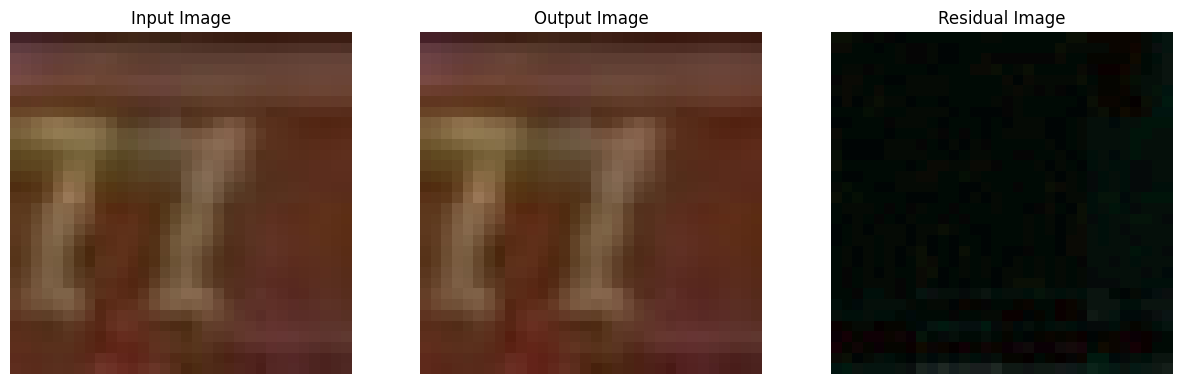

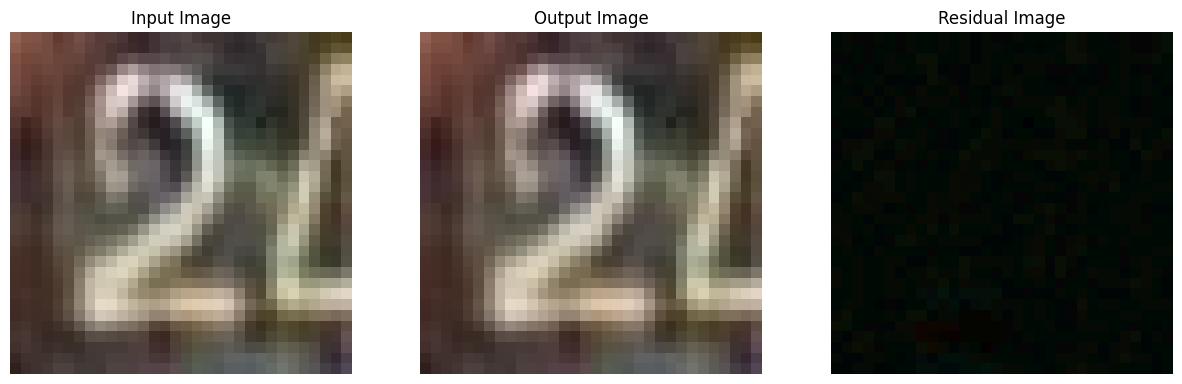

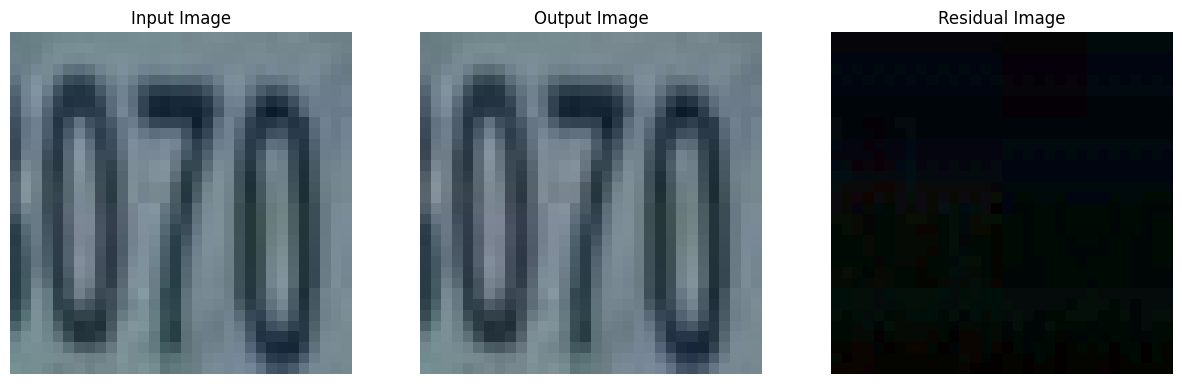

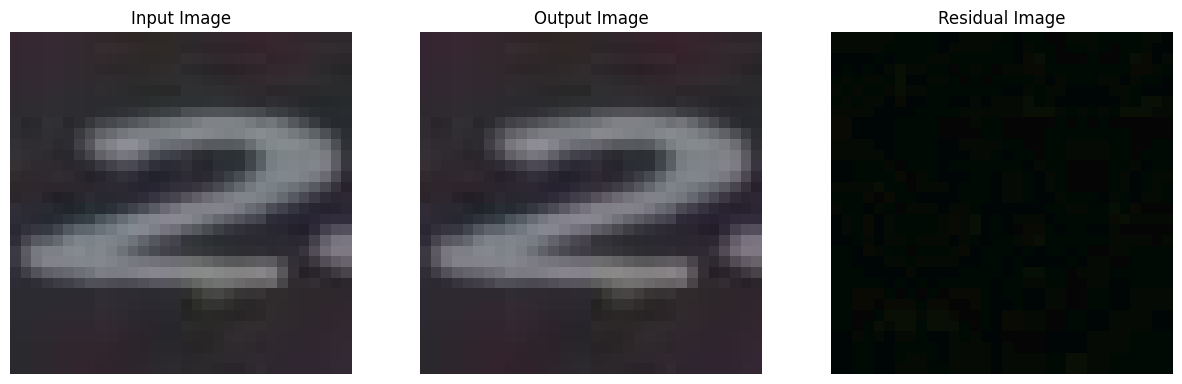

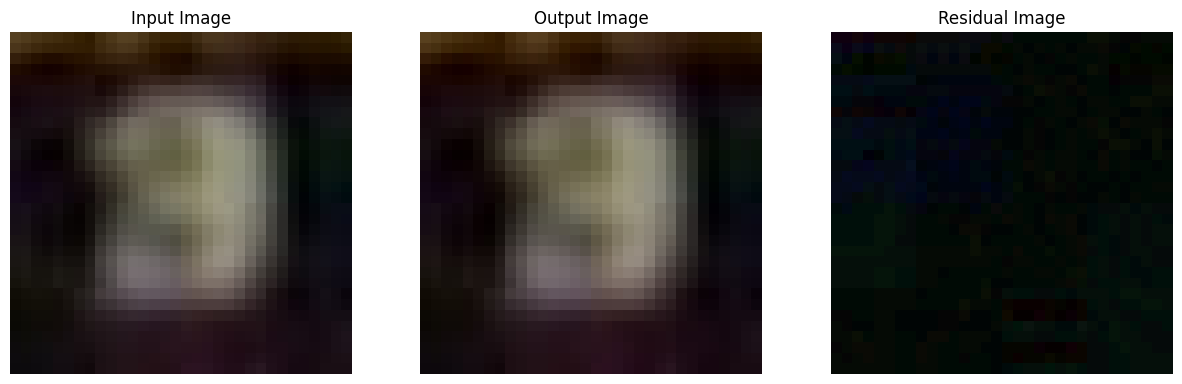

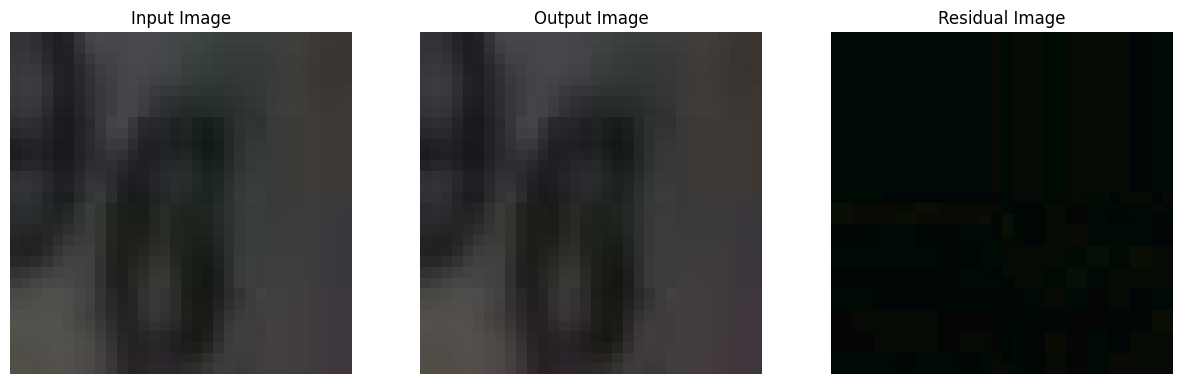

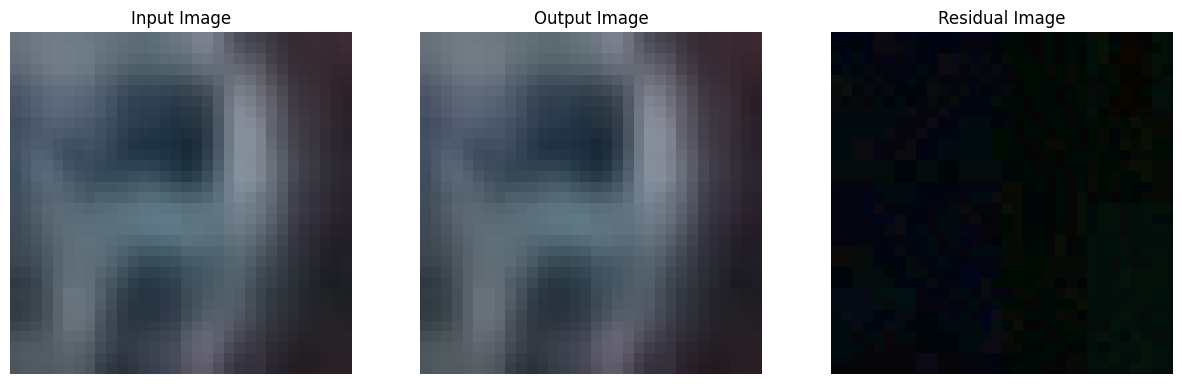

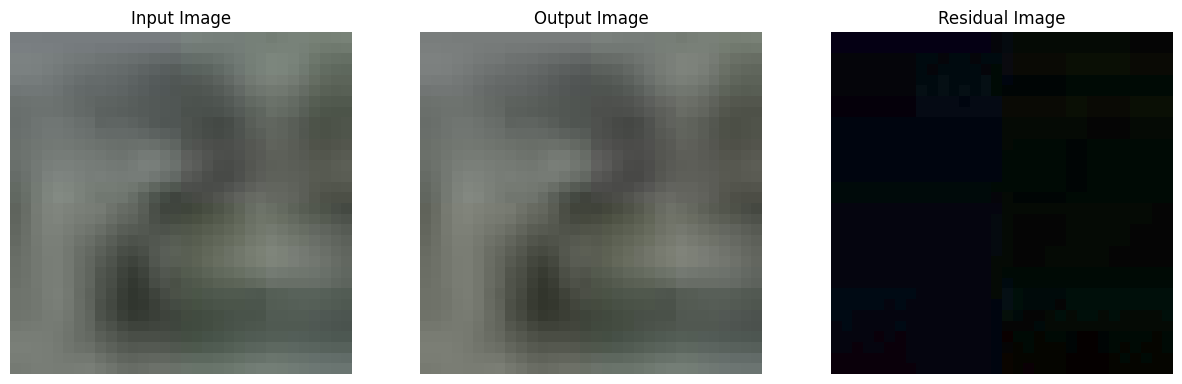

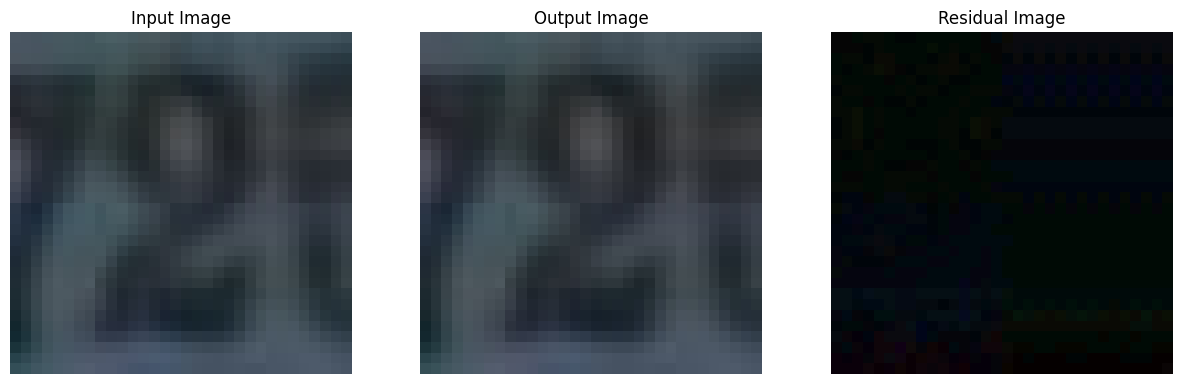

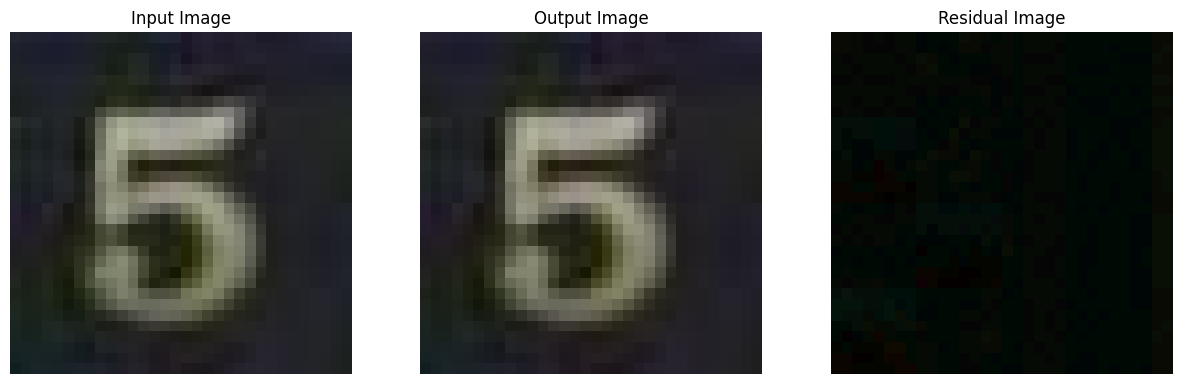

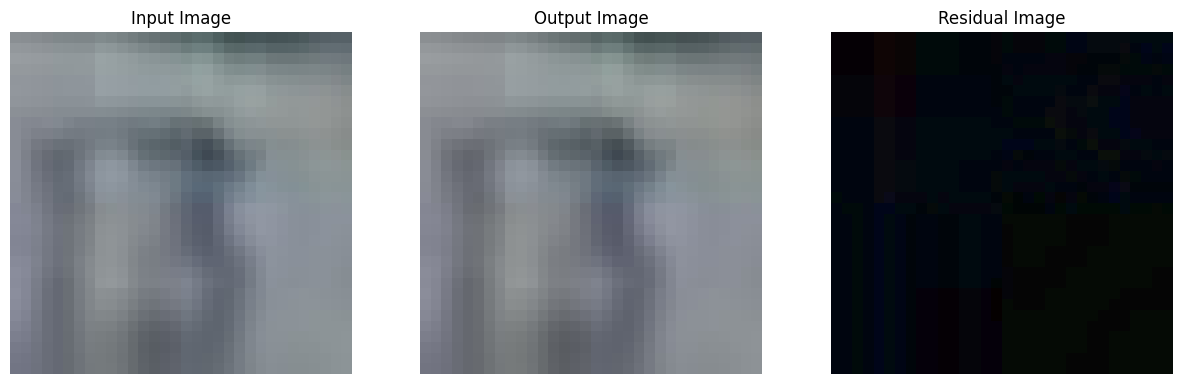

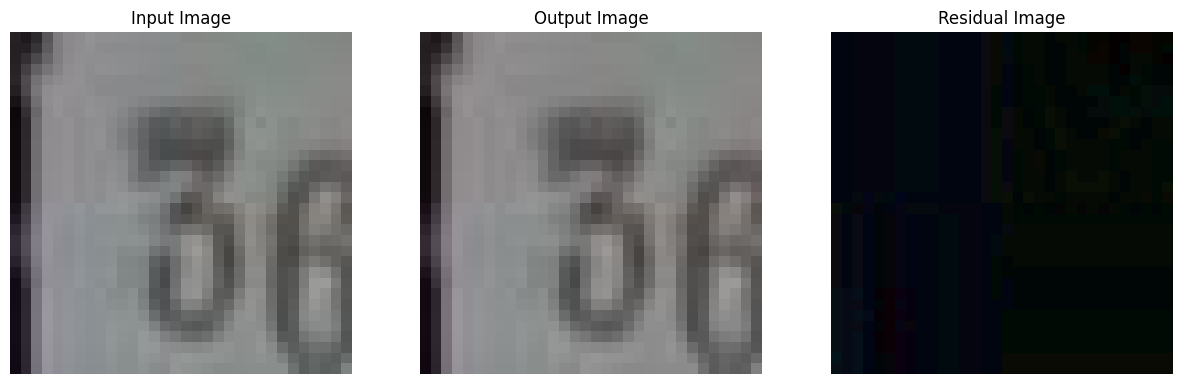

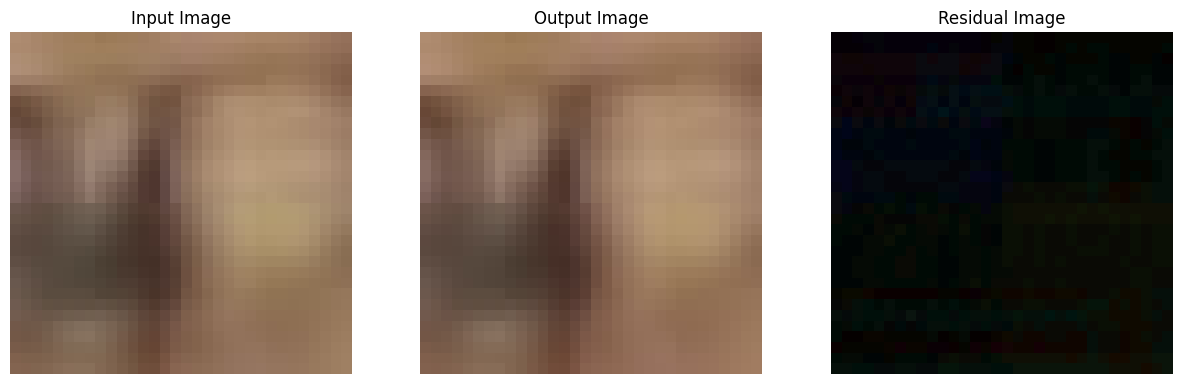

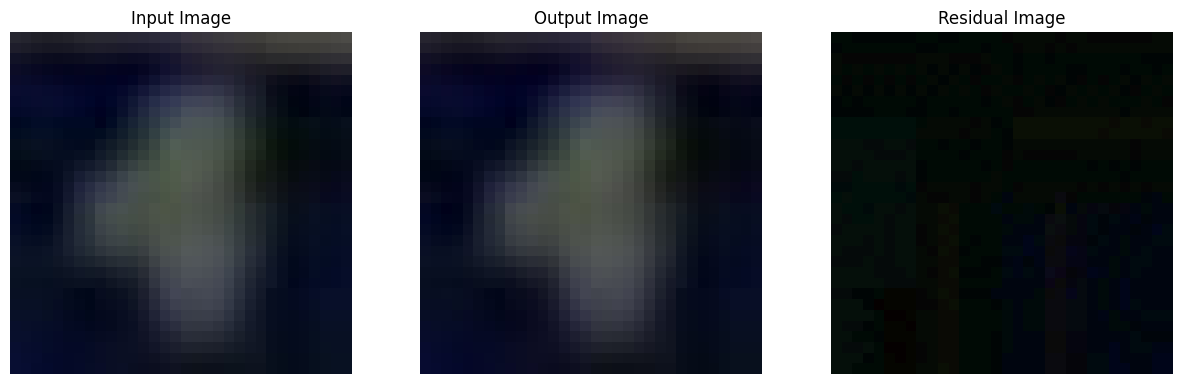

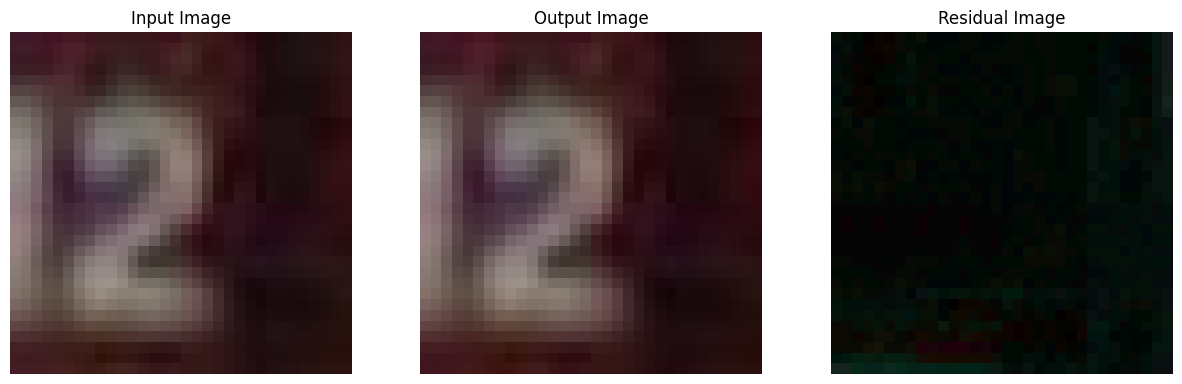

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_and_display_residual(input_folder, output_folder):
    """
    计算并展示输入和输出文件夹中具有相同文件名的图片的放大彩色残差。
    :param input_folder: 输入文件夹路径
    :param output_folder: 输出文件夹路径
    """
    input_files = os.listdir(input_folder)

    for file_name in input_files:
        input_file_path = os.path.join(input_folder, file_name)
        output_file_path = os.path.join(output_folder, file_name)

        if os.path.exists(output_file_path):
            # 读取图像
            input_image = Image.open(input_file_path)
            output_image = Image.open(output_file_path)

            # 确保图片是相同尺寸
            if input_image.size != output_image.size:
                print(f"Image sizes do not match for {file_name}. Skipping.")
                continue

            # 计算残差
            input_array = np.array(input_image, dtype=int)  # 使用整型防止溢出
            output_array = np.array(output_image, dtype=int)  # 使用整型防止溢出
            residual_array = np.abs(input_array - output_array)

            # 放大残差
            residual_array = residual_array * 5  # 假设放大5倍

            # 归一化到0-255范围
            residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

            # 创建残差图像
            residual_image = Image.fromarray(residual_array)

            # 使用matplotlib显示图像
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(input_image)
            axs[0].set_title('Input Image')
            axs[0].axis('off')

            axs[1].imshow(output_image)
            axs[1].set_title('Output Image')
            axs[1].axis('off')

            axs[2].imshow(residual_image)
            axs[2].set_title('Residual Image')
            axs[2].axis('off')

            plt.show()


# 使用方法
calculate_and_display_residual('data/svhn/2023-12-21-00:04:42', 'data/svhn/test')


In [1]:
import pickle

with open('./output/cifar10/gtsrb_backdoored_encoder/2023-12-20-16:03:49/feature_banks.pkl', 'rb') as f:
    feature_banks = pickle.load(f)


print(feature_banks.keys())
args=feature_banks['args']
train=feature_banks['training']
test=feature_banks['testing']
backdoor=feature_banks['backdoor']
target=feature_banks['target']

print('args',feature_banks['args'])
print('train',feature_banks['training'].shape)
print('test',feature_banks['testing'].shape)
print('backdoor',feature_banks['backdoor'].shape)
print('target',feature_banks['target'].shape)


dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.3, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='5', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=5.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=False, reference_file='./reference/cifar10/priority.npz', reference_label=0, results_dir='./output/cifar10/gtsrb_backdoored_encoder/2023-12-20-16:03:49/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2023-12-20-16:03:49', trigger_file='optimize_filter/trigger/cifar10/2023-12-06-23-41-20/ssim0.9328_psnr22.50_lp0.0291_wd0.603_color11.353.pt', value_hsv=1)
train (39209, 512)
test (12630, 512)
backdoor (12630, 512)
target (1, 512)


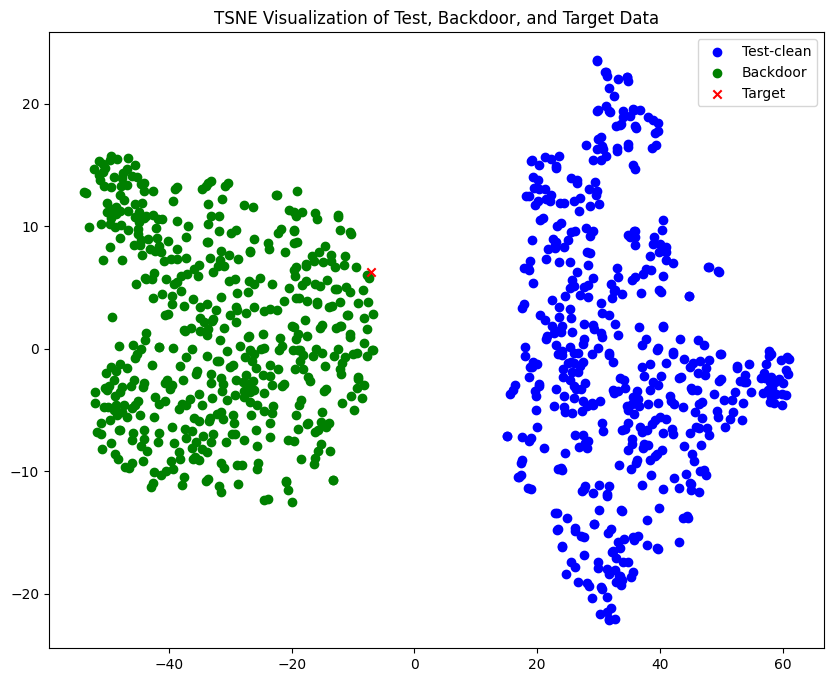

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
# For demonstration, I will create dummy data with the same shapes
np.random.seed(0)  # For reproducibility of random data
# Concatenating all arrays for TSNE
num=500
data = np.concatenate((test[:num], backdoor[:num], target))

# Applying TSNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

# Splitting the transformed data
transformed_test = transformed_data[:num]
transformed_backdoor = transformed_data[num:num*2]
transformed_target = transformed_data[-1]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(transformed_test[:, 0], transformed_test[:, 1], c='blue', label='Test-clean')
plt.scatter(transformed_backdoor[:, 0], transformed_backdoor[:, 1], c='green', label='Backdoor')
plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
plt.title("TSNE Visualization of Test, Backdoor, and Target Data")
plt.legend()
plt.show()


dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.0, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='5', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=False, reference_file='./reference/cifar10/truck.npz', reference_label=0, results_dir='./output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:59/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2023-12-25-20:38:59', trigger_file='optimize_filter/trigger/cifar10/2023-12-20-23-18-29/ssim0.9855_psnr30.10_lp0.0166_wd0.066_color3.966.pt', value_hsv=1)
train (5000, 512)
test (8000, 512)
backdoor (8000, 512)
target (1, 512)


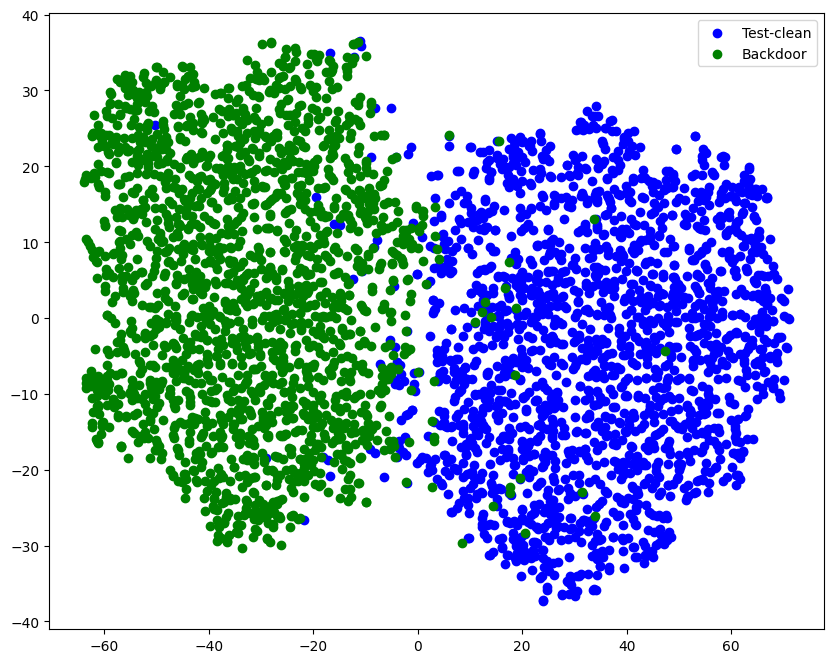

In [23]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def main(feature_path):
    with open(feature_path, 'rb') as f:
        feature_banks = pickle.load(f)

    print(feature_banks.keys())
    args=feature_banks['args']
    train=feature_banks['training']
    test=feature_banks['testing']
    backdoor=feature_banks['backdoor']
    target=feature_banks['target']

    print('args',feature_banks['args'])
    print('train',feature_banks['training'].shape)
    print('test',feature_banks['testing'].shape)
    print('backdoor',feature_banks['backdoor'].shape)
    print('target',feature_banks['target'].shape)

    # Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
    # For demonstration, I will create dummy data with the same shapes
    np.random.seed(0)  # For reproducibility of random data
    # Concatenating all arrays for TSNE
    num=2000
    data = np.concatenate((test[:num], backdoor[:num], target))

    # Applying TSNE
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(data)

    # Splitting the transformed data
    transformed_test = transformed_data[:num]
    transformed_backdoor = transformed_data[num:num*2]
    transformed_target = transformed_data[-1]

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(transformed_test[:, 0], transformed_test[:, 1], c='blue', label='Test-clean')
    plt.scatter(transformed_backdoor[:, 0], transformed_backdoor[:, 1], c='green', label='Backdoor')
    # plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
    # plt.title("TSNE Visualization of Test, Backdoor, and Target Data")
    plt.legend()
    # plt.show()
    path = feature_path.split('/')[-2]
    plt.savefig(f'TSNE/{path}.png')
    # plt.close()

if __name__ == '__main__':
    # main('../output/stl10/cifar10_backdoored_encoder/2023-12-16-17:34:27bpp/feature_banks.pkl')
    # main('../output/cifar10/stl10_backdoored_encoder/2023-12-16-17:28:47bpp/feature_banks.pkl')


    #### ins trigger
    # main('../output/stl10/cifar10_backdoored_encoder/2023-12-29-21:21:21/feature_banks.pkl')
    # main('../output/stl10/gtsrb_backdoored_encoder/2023-12-29-21:21:16/feature_banks.pkl')


    #### patch trigger
    # main('../output/stl10/cifar10_backdoored_encoder/feature_banks.pkl')
    # main('../output/stl10/gtsrb_backdoored_encoder/feature_banks.pkl')
    # main('../output/stl10/svhn_backdoored_encoder/feature_banks.pkl')
    # main('../output/cifar10/stl10_backdoored_encoder/feature_banks.pkl')
    # main('../output/cifar10/gtsrb_backdoored_encoder/feature_banks.pkl')
    main('../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:59/feature_banks.pkl')

    # main('../output/cifar10/gtsrb_backdoored_encoder/2023-12-20-16:03:49/feature_banks.pkl')

dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.1, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='4', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=False, reference_file='./reference/cifar10/truck.npz', reference_label=0, results_dir='./output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:31/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2023-12-25-20:38:31', trigger_file='optimize_filter/trigger/cifar10/2023-12-06-23-41-20/ssim0.9328_psnr22.50_lp0.0291_wd0.603_color11.353.pt', value_hsv=1)
train (5000, 512)
test (8000, 512)
backdoor (8000, 512)
target (1, 512)


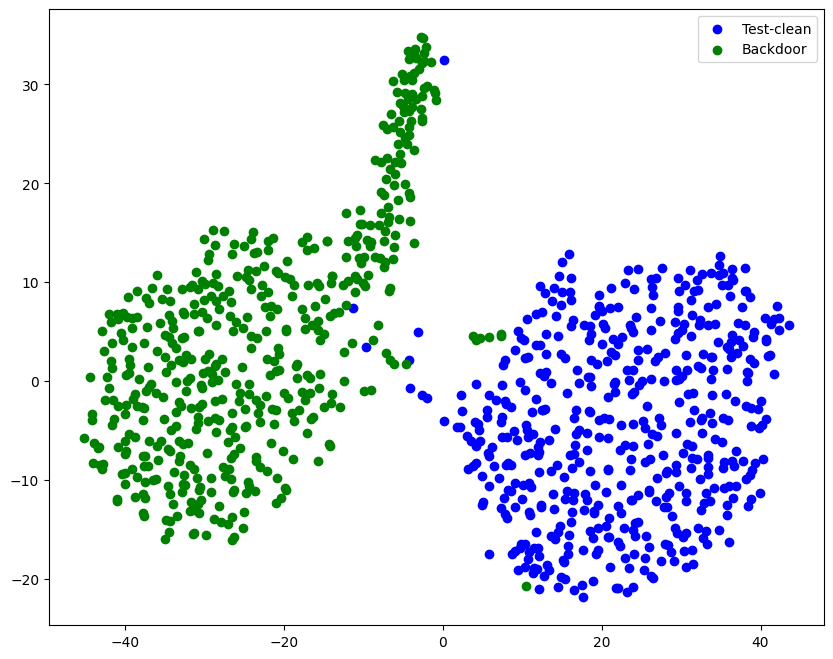

In [18]:
main('../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:31/feature_banks.pkl')

dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=128, color=0.1, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='1', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=True, reference_file='./reference/cifar10/priority.npz', reference_label=0, results_dir='./output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:21:01/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2024-01-03-12:21:01', trigger_file='optimize_filter/trigger/cifar10/2023-12-06-23-41-20/ssim0.9328_psnr22.50_lp0.0291_wd0.603_color11.353.pt', value_hsv=1)
train (39209, 512)
test (12630, 512)
backdoor (12630, 512)
target (1, 512)


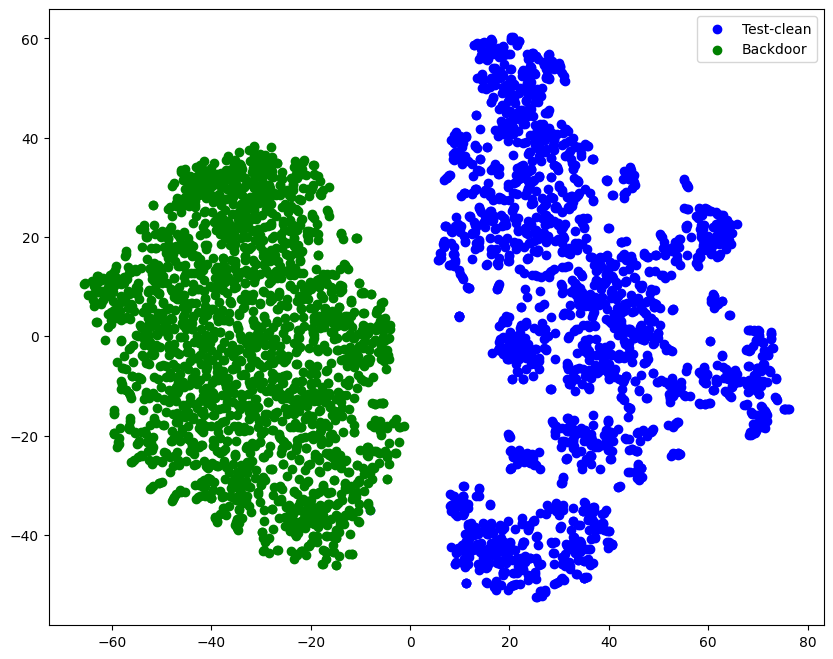

In [25]:
main('../output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:21:01/feature_banks.pkl')

dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.0, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='0', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=True, reference_file='./reference/cifar10/priority.npz', reference_label=0, results_dir='./output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:20:49/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2024-01-03-12:20:49', trigger_file='optimize_filter/trigger/cifar10/2023-12-20-23-18-29/ssim0.9855_psnr30.10_lp0.0166_wd0.066_color3.966.pt', value_hsv=1)
train (39209, 512)
test (12630, 512)
backdoor (12630, 512)
target (1, 512)


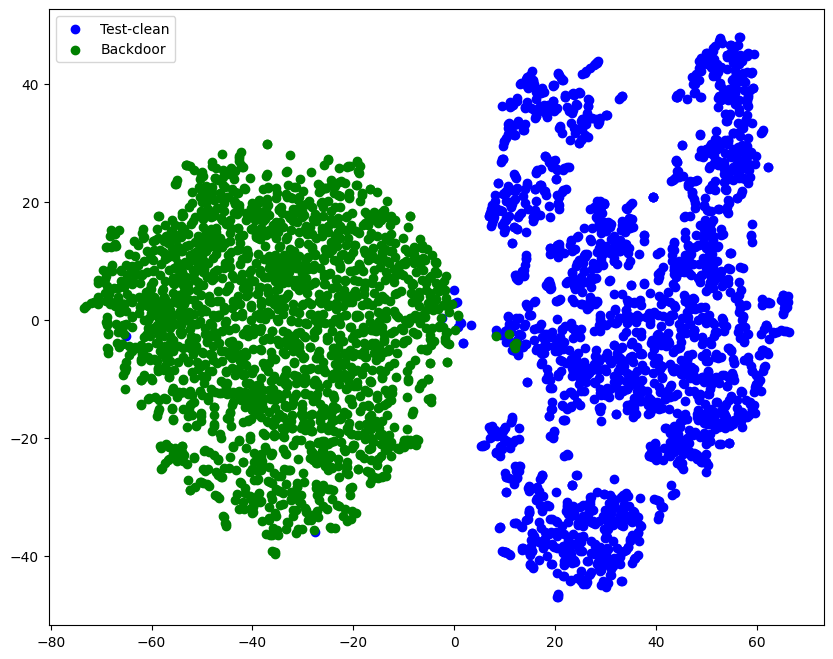

In [24]:
main('../output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:20:49/feature_banks.pkl')

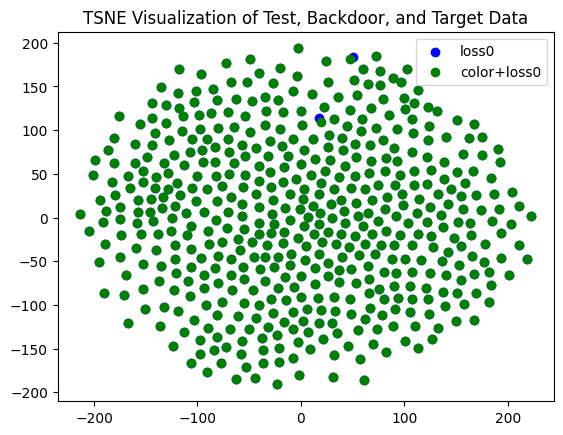

In [14]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def main(f1,f2):
    with open(f1, 'rb') as f:
        feature_banks1 = pickle.load(f)
    with open(f1, 'rb') as f:
        feature_banks2 = pickle.load(f)

    backdoor1=feature_banks1['backdoor']
    backdoor2=feature_banks2['backdoor']


    # Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
    # For demonstration, I will create dummy data with the same shapes
    np.random.seed(0)  # For reproducibility of random data
    # Concatenating all arrays for TSNE
    num=500
    data = np.concatenate((backdoor1[:num], backdoor2[:num]))

    # Applying TSNE
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(data)

    # Splitting the transformed data
    backdoor1 = transformed_data[:num]
    backdoor2 = transformed_data[num:num*2]

    # Plotting
    plt.figure()
    plt.scatter(backdoor1[:, 0], backdoor1[:, 1], c='blue', label='loss0')
    plt.scatter(backdoor2[:, 0], backdoor2[:, 1], c='green', label='color+loss0')
    # plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
    plt.title("TSNE Visualization of Test, Backdoor, and Target Data")
    plt.legend()
    # plt.show()
    path = 'add_salt_and_pepper_noise'
    plt.savefig(f'TSNE/{path}.png')
    # plt.close()

if __name__ == '__main__':
    f1='../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:59/feature_banks.pkl'
    f2='../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:31/feature_banks.pkl'
    main(f1,f2)

dict_keys(['patch', 'ins', 'filter'])
ins torch.Size([10000, 512])
patch torch.Size([10000, 512])
filter torch.Size([10000, 512])


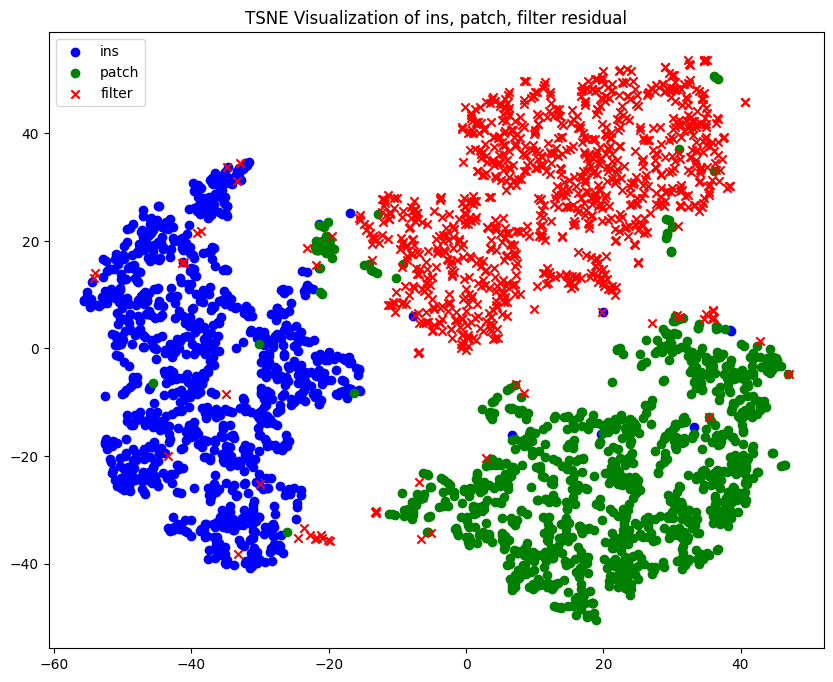

In [4]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

with open('feature_bank/features_residual.pkl', 'rb') as f:
    feature_banks = pickle.load(f)

print(feature_banks.keys())
ins=feature_banks['ins'].cpu()
patch=feature_banks['patch'].cpu()
filter_img=feature_banks['filter'].cpu()

print('ins',feature_banks['ins'].shape)
print('patch',feature_banks['patch'].shape)
print('filter',feature_banks['filter'].shape)

# Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
# For demonstration, I will create dummy data with the same shapes
np.random.seed(0)  # For reproducibility of random data
# Concatenating all arrays for TSNE
num=1000
data = np.concatenate((ins[:num], patch[:num], filter_img[:num]))

# Applying TSNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

# Splitting the transformed data
transformed_ins = transformed_data[:num]
transformed_patch = transformed_data[num:num*2]
transformed_filter = transformed_data[num*2:num*3]


# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(transformed_ins[:, 0], transformed_ins[:, 1], c='blue', label='ins')
plt.scatter(transformed_patch[:, 0], transformed_patch[:, 1], c='green', label='patch')
plt.scatter(transformed_filter[:, 0], transformed_filter[:, 1], c='red', label='filter', marker='x')
# plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
plt.title("TSNE Visualization of ins, patch, filter residual")
plt.legend()
plt.show()
plt.savefig(f'TSNE/feature_ins_patch_filter_residual.png')
plt.close()



dict_keys(['ins', 'filter', 'ins_aug', 'filter_aug'])


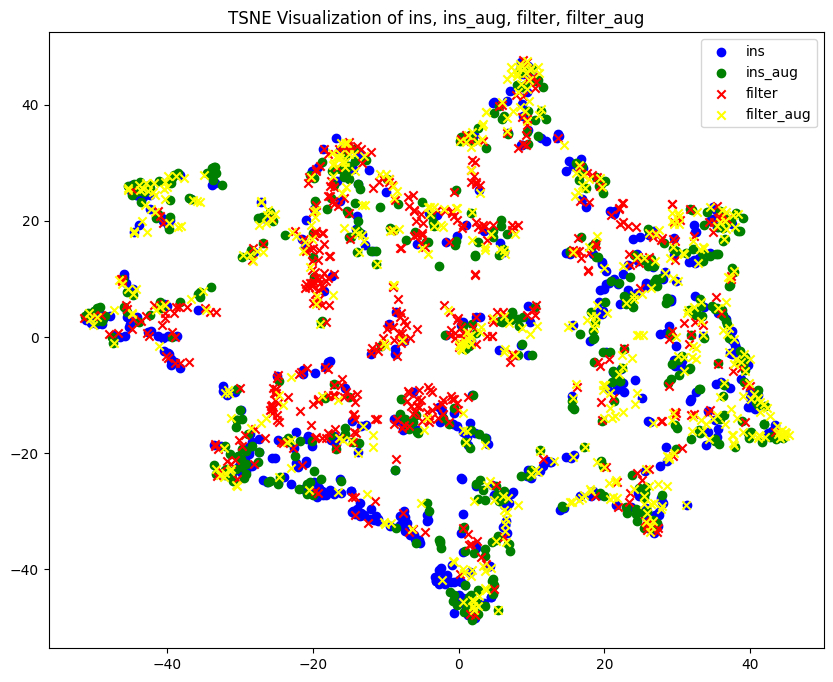

In [14]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

with open('feature_bank/features_residual_aug.pkl', 'rb') as f:
    feature_banks = pickle.load(f)

print(feature_banks.keys())
ins=feature_banks['ins'].cpu()
ins_aug=feature_banks['ins_aug'].cpu()
# patch=feature_banks['patch'].cpu()
filter_img=feature_banks['filter'].cpu()
filter_aug=feature_banks['filter_aug'].cpu()


# Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
# For demonstration, I will create dummy data with the same shapes
np.random.seed(0)  # For reproducibility of random data
# Concatenating all arrays for TSNE
num=500
data = np.concatenate((ins[:num], ins_aug[:num], filter_img[:num], filter_aug[:num]))

# Applying TSNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

# Splitting the transformed data
transformed_ins = transformed_data[:num]
transformed_ins_aug = transformed_data[num:num*2]
transformed_filter = transformed_data[num*2:num*3]
transformed_filter_aug = transformed_data[num*3:num*4]


# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(transformed_ins[:, 0], transformed_ins[:, 1], c='blue', label='ins')
plt.scatter(transformed_ins_aug[:, 0], transformed_ins_aug[:, 1], c='green', label='ins_aug')
plt.scatter(transformed_filter[:, 0], transformed_filter[:, 1], c='red', label='filter', marker='x')
plt.scatter(transformed_filter_aug[:, 0], transformed_filter_aug[:, 1], c='yellow', label='filter_aug', marker='x')
# plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
plt.title("TSNE Visualization of ins, ins_aug, filter, filter_aug")
plt.legend()
plt.show()
plt.savefig(f'TSNE/feature_ins_filter_aug1.png')
plt.close()

